No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


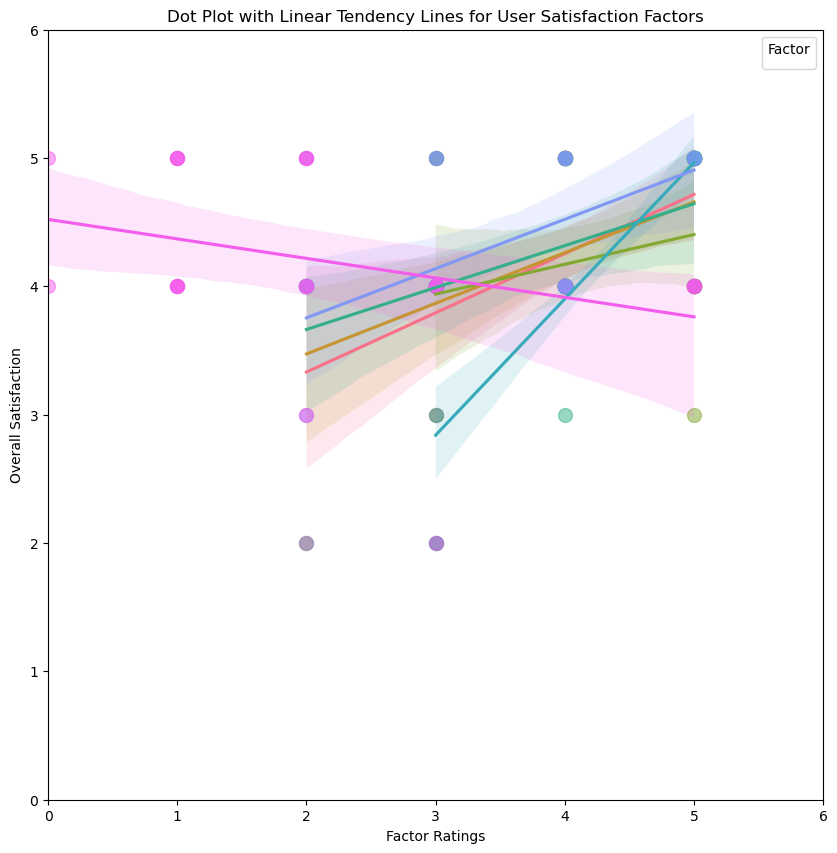

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data matrix explicitly
data = {
    'Time': [5, 5, 4, 4, 5, 4, 5, 3, 4, 4, 5, 4, 2, 4, 4, 3, 4, 4, 3, 4, 3, 2, 5, 4, 3],
    'Accuracy': [4, 5, 2, 5, 5, 3, 5, 4, 5, 3, 4, 2, 2, 4, 5, 5, 4, 4, 3, 4, 4, 2, 5, 4, 3],
    'Image': [5, 5, 4, 4, 4, 4, 3, 5, 5, 5, 3, 3, 4, 4, 5, 4, 3, 4, 5, 4, 3, 3, 5, 4, 5],
    'Structuring': [5, 5, 4, 4, 3, 4, 3, 4, 3, 5, 4, 2, 3, 4, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 4],
    'Information': [5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 3, 5, 4, 3],
    'Reliability': [3, 5, 3, 4, 2, 2, 4, 3, 3, 4, 2, 2, 3, 3, 4, 5, 4, 3, 3, 4, 3, 2, 4, 2, 2],
    'Repeat questions': [1, 0, 2, 1, 5, 1, 5, 1, 0, 1, 2, 3, 5, 3, 1, 2, 1, 1, 2, 5, 1, 3, 2, 3, 2],
    'Overall satisfaction': [5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 2, 5, 4, 3]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for suitable plotting
df_long = pd.melt(df, id_vars=['Overall satisfaction'], var_name='Factor', value_name='Rating')

# Create a matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 10))  # Create a square plot for equal axes

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(df_long['Factor'].unique()))

# Plot each factor with seaborn regplot for better control over axes
for i, factor in enumerate(df_long['Factor'].unique()):
    sns.regplot(data=df_long[df_long['Factor'] == factor], x='Rating', y='Overall satisfaction', ax=ax,
                scatter_kws={'s': 100, 'alpha': 0.5, 'color': colors[i]}, line_kws={'color': colors[i]},
                ci=95)  # 95% confidence interval

ax.set_xlim(0, 6)  # Set the same limits for x and y
ax.set_ylim(0, 6)
ax.legend(title='Factor')
ax.set_title('Dot Plot with Linear Tendency Lines for User Satisfaction Factors')
ax.set_xlabel('Factor Ratings')
ax.set_ylabel('Overall Satisfaction')

plt.show()



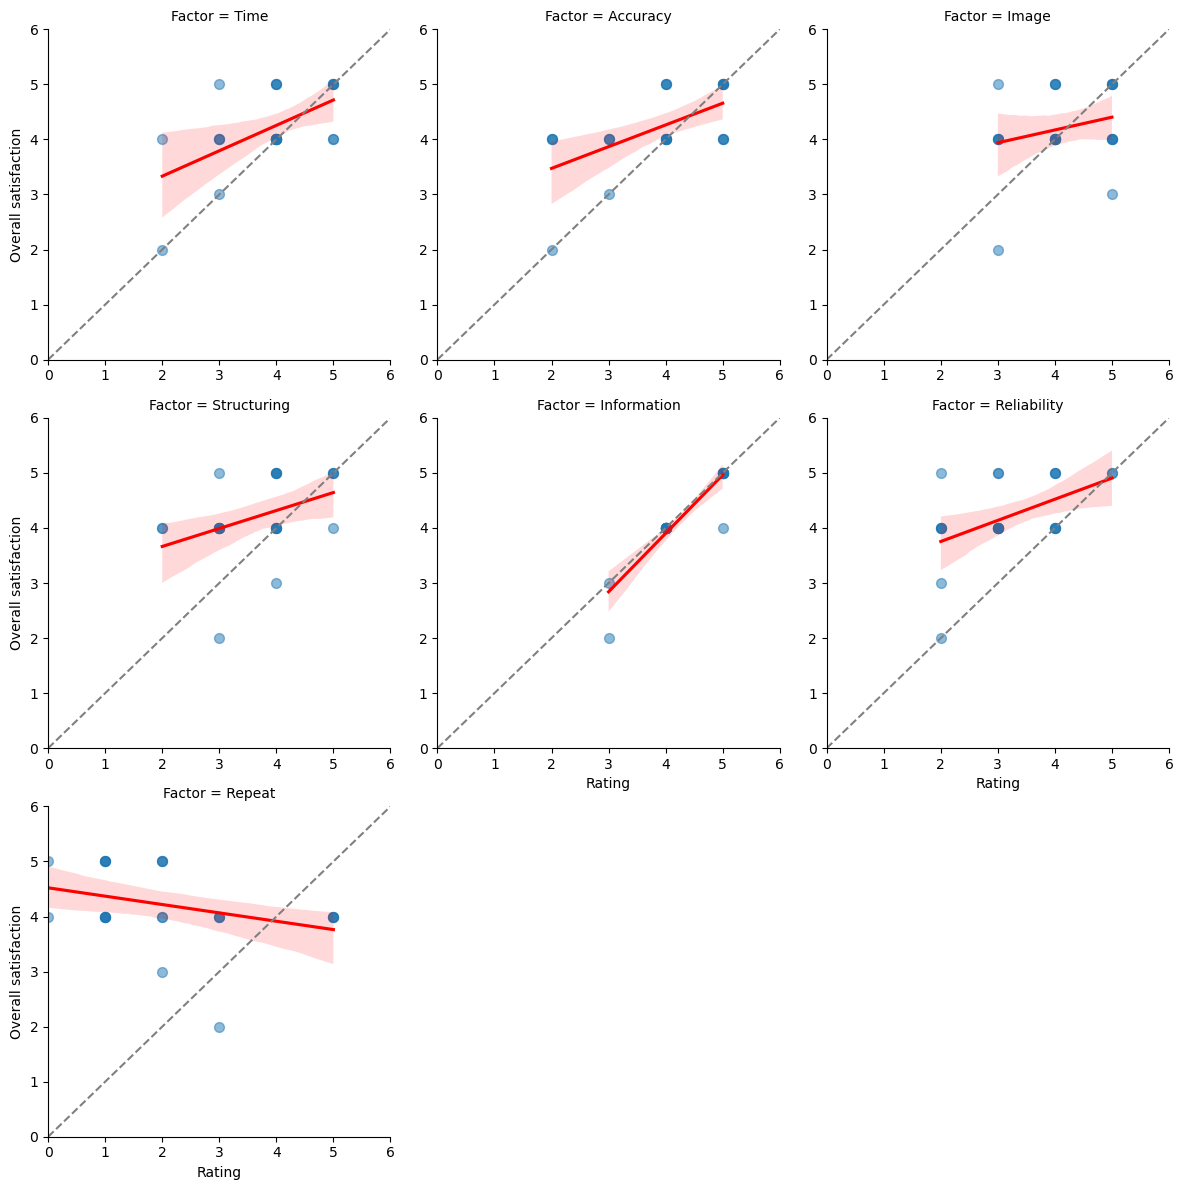

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data matrix explicitly
data = {
    'Time': [5,5,4,4,5,4,5,3,4,4,5,4,2,4,4,3,4,4,3,4,3,2,5,4,3],
    'Accuracy': [4,5,2,5,5,3,5,4,5,3,4,2,2,4,5,5,4,4,3,4,4,2,5,4,3],
    'Image': [5,5,4,4,4,4,3,5,5,5,3,3,4,4,5,4,3,4,5,4,3,3,5,4,5],
    'Structuring': [5,5,4,4,3,4,3,4,3,5,4,2,3,4,5,4,4,4,3,3,3,3,3,2,4],
    'Information': [5,5,4,5,4,4,5,4,4,4,5,4,4,4,5,5,4,5,4,4,4,3,5,4,3],
    'Reliability': [3,5,3,4,2,2,4,3,3,4,2,2,3,3,4,5,4,3,3,4,3,2,4,2,2],
    'Repeat': [1,0,2,1,5,1,5,1,0,1,2,3,5,3,1,2,1,1,2,5,1,3,2,3,2],
    'Overall satisfaction': [5,5,4,5,4,4,4,4,4,4,5,4,4,4,5,5,4,5,4,4,4,2,5,4,3]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for suitable plotting
df_long = pd.melt(df, id_vars=['Overall satisfaction'], var_name='Factor', value_name='Rating')

# Create a FacetGrid to plot data
g = sns.FacetGrid(df_long, col='Factor', col_wrap=3, height=4, aspect=1, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='Rating', y='Overall satisfaction', scatter_kws={'s': 50, 'alpha':0.5}, line_kws={'color': 'red'})

# Adjust each axis individually
for ax in g.axes.flat:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.plot([0, 6], [0, 6], c="gray", ls="--")  # Optional: add a diagonal line for reference

g.add_legend()
plt.show()
